## Summary: This notebook is about analysis on 60,000 twitters collected Oct 24 - Oct 30 in Manhanttan. We focus on twitters mentioning brands in our dictionary. We are trying to find people's sentiment and language on differenct brands and different categories. 

In [170]:
from pymongo import MongoClient
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
import re
from textblob import TextBlob

## Read in the brand dictionary

In [31]:
import json
with open('dictionary.json', 'r') as f:
     data = json.load(f)
df = pd.DataFrame.from_dict(data).transpose()[3:]

In [33]:
df.head()

,category,subtype
100% pure,cosmetics,beauty
16 handles,sweets,food & drink
17th street surf shop,activewear,apparel
21 toppings,sweets,food & drink
24 hour cafe,full service,food & drink


In [40]:
df.shape

(4708, 2)

## Connect to Mongodb

In [37]:
client = MongoClient('localhost', 27017)
db = client.Manhattan_Twitter_db
collection = db.twitter_collection

## Read in twitter data and filter for ones mentioning our brands

In [38]:
twitters = []
for twitter in collection.find():
    twitters.append(twitter['text'])

In [45]:
twitters = [x.lower() for x in twitters]

In [55]:
# twitter_brand_dict = {}
# for doc in twitters:
#     keep = False
#     brand_list = []
#     for brand in brands:
#         if ' '+brand+' ' in doc:
#             brand_list.append(brand)
#             keep = True
#     if keep: 
#         twitter_brand_dict[doc] = brand_list
        

# twitter_brand_dict = {}          
            

## Match twitter with each brand

In [74]:
twitter_brand_dict = {}
for brand in brands:
    keep = False
    twitter_list = []
    for doc in twitters:
        if ' '+brand+' ' in doc:
            twitter_list.append(doc)
            keep = True
    if keep: 
        twitter_brand_dict[brand] = twitter_list

In [118]:
twitter_brand_df = pd.Series(twitter_brand_dict,name="Twitter")
twitter_brand_df = pd.DataFrame(twitter_brand_df)

In [119]:
for i in range(0,twitter_brand_df.shape[0]):
    twitter_brand_df["Twitter"][i] = twitter_brand_dict.get(twitter_brand_df.index[i])

In [140]:
data = twitter_brand_df.merge(df,how="left",left_index=True,right_index=True)

In [141]:
data["num_twitter"] = 0
for i in range(0,data.shape[0]):
    data["num_twitter"][i] = len(data.Twitter[i])

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [142]:
sum(data.num_twitter)

4799

## We end up with 4799 twitters mentioning our brands in total,still some inconsistency I believe, let's check

In [149]:
data.sort("num_twitter",ascending = False).head(10)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Twitter,category,subtype,num_twitter
avenue,[arguably the most magical place on earth. @ 7...,apparel,women's apparel,379
manhattan,[view @ lower manhattan https://t.co/vmumdncw2...,apparel,casual,305
yes,[@sopdet @blueshirtbanter and yes that is obvi...,essentials,home goods,178
guess,[not a huge geno fan but unlike fitz geno work...,apparel,casual,175
square,[seasonal is where it's at @ union square gree...,beauty,accessories & more,166
apple,"[@rachidrouis my brother, who lives in san fra...",essentials,tech,121
brand,[the greatest thing you can ever do for your b...,subtype,category,103
bar,[i've felt pusha t &amp; kid cudi are ridiculo...,entertainment,hangout,103
museum,[business trip.... nice way to start the week!...,essentials,specialty retailer,102
market,"[""big banks cede market share to #nonbanks"" ht...",grocery,supermarket,86


In [150]:
data.sort("num_twitter").head(10)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Twitter,category,subtype,num_twitter
24 hour fitness,[train to get strong! nothing else matters! #t...,specialty fitness,health & wellness,1
marijuana dispensary,[the only positive about a marijuana dispensar...,essentials,specialty retailer,1
magnolia,"[i'm at magnolia bakery in new york, ny https:...",sweets,food & drink,1
maggiano's,[join the maggiano's team! see our latest #job...,food & drink,quick service,1
madewell,[join the madewell team! see our latest #job o...,essentials,home goods,1
macy's backstage,"[see our latest #brooklyn, ny #job and click t...",discount,department store,1
lush,[i'm at lush spa - fresh handmade treatments -...,beauty,cosmetics,1
lululemon,[just a typical day in the office. lululemonny...,apparel,activewear,1
louis vuitton,"[@theandrewsystem louis vuitton sean, up in be...",beauty,accessories & more,1
little caesars,"[i'm at little caesars pizza in brooklyn, ny h...",food & drink,quick service,1


In [183]:
data[data.index=="apple"].Twitter[0][:10]


['@rachidrouis my brother, who lives in san francisco, keeps telling me it works great there. maybe it should be called apple bay area maps.',
 't-mobile is to the mobile carrier industry what apple was to the computer industry circa 2003.\n\nhttps://t.co/iesmkk49bs',
 'blue toad flower city blonde apple cider now available on tap. https://t.co/mqxvva8xfn #beermenus',
 '@film_girl great! maybe the apple store will no longer be sold out of the series 2 that i want!',
 'finally gonna get my fix of caramel apple spice from starbucks. #fall16',
 'wow, apple is showing adding in the app store search? steve jobs is rolling over right now 😕 https://t.co/gwglmmorxp',
 '@ginna_g saw a piece on apple cider vinegar on my local news very interesting benefits.',
 'the 90s pop playlist on apple music got me through 5 hours of research today 👍🏼👍🏼👍🏼👍🏼👍🏼',
 "@cnbc that raving fan loyalty didn't hurt apple much. it's a compliment",
 '@fruit_bliss #holidaybliss a1 the leaves changing colors, the cool wea

## As we can see, since some brands are composed of regular words, some redundant tweets came in. Need to find a way to differentiate among them. (e.g. apple mixed with apple cider)

## Calculate a Sentiment score, same idea as venues of foursquare

In [171]:
def get_sentiment_score(txt):
    text=[]
    for tips in txt:
        text.append(re.sub(r'^https?:\/\/.*[\r\n]*', '', tips, flags=re.MULTILINE))
    polarity=[]
    for tip in text:
        testimonial = TextBlob(tip)
        polarity.append(testimonial.sentiment.polarity)
    vals=np.array(polarity)
    if vals.size != 0:
        score = sum(vals>0)/(vals.size)
        return score
    else : 
        return 0
data["sentiment_score"]=data["Twitter"].apply(get_sentiment_score)

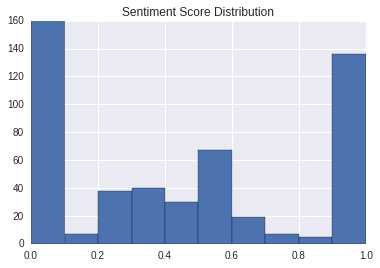

In [178]:
plt.hist(data["sentiment_score"])
plt.title("Sentiment Score Distribution")

## The scores are really polarized, let's see some highest and lowest examples.

In [180]:
data.sort("sentiment_score").head(5)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Twitter,category,subtype,num_twitter,sentiment_score
zara,[@alyciakisa @zaynxmikey zara will always find...,upscale casual,apparel,1,0.0
small business,"[""street food vendors are a type of small busi...",specialty retailer,essentials,3,0.0
fashion nova,[when fashion nova has maternity jeans 😍],women's apparel,apparel,1,0.0
skatepark,[chadece forever🌹 #deceforever #peacefordece i...,entertainment,sports,1,0.0
fendi,[yeah like sorry i didn't eat your puss every ...,luxury,apparel,1,0.0


## Let's check zara

In [194]:
data[data.index=="zara"].Twitter[0]


['@alyciakisa @zaynxmikey zara will always find a way pleathe']

In [200]:
data[data.index=="fendi"].Twitter[0]


["yeah like sorry i didn't eat your puss every hour and only cooked you 1 meal a day, and i got you a fendi instead o… https://t.co/7oyk2rzjuy"]

## The sentiment result won't be too accurate. People can complains other things other than the brand itself.

In [201]:
data.sort("sentiment_score",ascending = False).head(5)

/home/peimengsui/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Twitter,category,subtype,num_twitter,sentiment_score
24 hour fitness,[train to get strong! nothing else matters! #t...,specialty fitness,health & wellness,1,1.0
expressions,[if you need more of an excuse to appreciate @...,casual,apparel,1,1.0
curves,[@jazzyjulzz23 lol are they? i mean i think yo...,entertainment,sports,1,1.0
pandora,"[a customer, a fan, and a guest today! (@ pand...",beauty,accessories & more,32,1.0
david's bridal,[@maryarrr it's because i bought from david's ...,essentials,home goods,1,1.0


In [197]:
data[data.index=="pandora"].Twitter[0]

['a customer, a fan, and a guest today! (@ pandora media in new york, ny) https://t.co/dzpzhshgna',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/aqac5ubdzx',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/m2gzktnfjt',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/nvu4vfojdy',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/nvu4vfojdy',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/k928nrdhlh',
 'https://t.co/wzmqfayzev\nnew antione dunn - everything \n#everything   #antionedunn ...\n\nyoutube . spotify &amp; pandora https://t.co/e903ne2

## Some annoying ads...

In [198]:
data[data.index=="24 hour fitness"].Twitter[0]

['train to get strong! nothing else matters! #tunnelvision ##prxtakeover @ 24 hour fitness -… https://t.co/tpg6c8lcvv']

## Those seems usefule, although only one sample.

## Aggregate the sentiment score by category, hope to get stronger signal (i.e. more samples)

In [202]:
data.head()

,Twitter,category,subtype,num_twitter,sentiment_score
24 hour fitness,[train to get strong! nothing else matters! #t...,specialty fitness,health & wellness,1,1.00
4d,"[i'm at planet earth 4d theater in brooklyn, n...",enterainment,family,1,0.00
7/11,[@copastetik @_kimchanel_ like 7/11 😭😭😭 &amp; ...,grocery,convenience,1,0.00
abc,[@drmartyfox @deneenborelli @seanhannity @loud...,essentials,home goods,8,0.25
acme,[#champagne isn't just for celebrating. grab a...,grocery,supermarket,1,0.00


## Only keep records >10

In [217]:
data1 = data[data.category.isin (data.category.value_counts()[data.category.value_counts()>10].index)]

In [222]:
data1[["category","sentiment_score"]].groupby("category").mean()

,sentiment_score
category,
apparel,0.429559
beauty,0.390653
department store,0.480519
entertainment,0.422396
essentials,0.429925
food & drink,0.495481
full service,0.413889
grocery,0.384441
specialty retailer,0.480797


## Let's check word frequency in different categories

In [241]:
l = []
for i in range(0,data1.shape[0]):
    for j in range(0,len(data1["Twitter"][i])):
        l.append((data1["Twitter"][i][j],data1["category"][i]))

In [242]:
word_data = pd.DataFrame.from_records(l,columns = ["Twitter","category"])

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string

rem = string.digits + '/\-+.'
rem_chars = lambda a: ''.join([i for i in a if i not in rem])
word_data['Twitter'] = word_data['Twitter'].apply(rem_chars)


In [244]:
stop_words = ENGLISH_STOP_WORDS

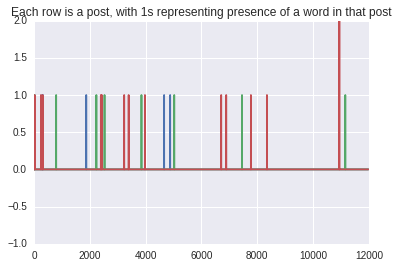

In [245]:
vec = CountVectorizer(max_df=.6, stop_words=stop_words)
vec_tar = LabelEncoder()

counts = vec.fit_transform(word_data['Twitter'])
targets = vec_tar.fit_transform(word_data['category'])
plt.plot(counts[:3].toarray().T)
plt.ylim([-1, 2])
plt.title('Each row is a post, with 1s representing presence of a word in that post')

In [250]:
top_words = {}
for itrg in np.unique(targets):
    loc = vec_tar.classes_[itrg]
    # Pull only the data points assigned to the current loction
    icounts = counts[targets == itrg, :].sum(0).squeeze()
    
    # Which counts had at least five occurrences
    msk_top_words = icounts > 30
    
    # The inverse transform turns the vectors back into actual words
    top_words[loc] = vec.inverse_transform(msk_top_words)[0]

In [251]:
top_words

{'apparel': array(['amp', 'avenue', 'bbus', 'bound', 'bridge', 'brooklyn', 'cleared',
        'construction', 'court', 'cream', 'directions', 'east', 'eb',
        'exit', 'flatbush', 'guess', 'https', 'incident', 'just', 'like',
        'line', 'livingston', 'lucky', 'manhattan', 'midtown', 'nb', 'new',
        'ny', 'nyc', 'park', 'pink', 'sb', 'st', 'station', 'street', 'th',
        'update', 'wb', 'york'], 
       dtype='<U50'),
 'beauty': array(['accident', 'amp', 'cleared', 'fashion', 'https', 'new', 'nyc',
        'pandora', 'park', 'square', 'st', 'station', 'stop', 'th', 'times',
        'traffic', 'union', 'york'], 
       dtype='<U50'),
 'department store': array(['https'], 
       dtype='<U50'),
 'entertainment': array(['amp', 'bar', 'classes', 'fitness', 'gym', 'https', 'library',
        'lounge', 'new', 'ny', 'sports', 'theater', 'york'], 
       dtype='<U50'),
 'essentials': array(['amp', 'apple', 'art', 'bank', 'hiring', 'home', 'https', 'job',
        'just', 'like',

In [252]:
unique_words = {}
for loc, words in top_words.items():
    others = top_words.copy()
    others.pop(loc)
    unique_words[loc] = [wrd for wrd in top_words[loc]
                         if wrd not in np.hstack(others.values())]
for loc, words in unique_words.items():
    print('{0}: {1}\n\n---\n'.format(loc, words))

apparel: ['avenue', 'bbus', 'bound', 'bridge', 'brooklyn', 'construction', 'court', 'cream', 'directions', 'east', 'eb', 'exit', 'flatbush', 'guess', 'incident', 'line', 'livingston', 'lucky', 'manhattan', 'midtown', 'nb', 'pink', 'sb', 'street', 'update', 'wb']

---

food & drink: ['cafe', 'food', 'pizza', 'restaurant', 'starbucks', 'subway']

---

full service: []

---

essentials: ['apple', 'art', 'bank', 'home', 'museum', 'police', 'security', 'want', 'yes']

---

specialty retailer: ['fame']

---

department store: []

---

grocery: ['careerarc', 'healthcare', 'latest', 'market', 'pharmacy']

---

beauty: ['accident', 'fashion', 'pandora', 'square', 'stop', 'times', 'traffic', 'union']

---

entertainment: ['bar', 'classes', 'fitness', 'gym', 'library', 'lounge', 'sports', 'theater']

---

women's apparel: ['justice']

---



## Future Work Direction: 
## 1. Need better way to catch real twitter mentioning brands
## 2. Still sparsity
## 3. Need to classify among twitter express sentiment about the brand itself and others
## 4. Still some potential use of word frequency
## 5. Look into paper about twitter brand sentiment analysis